# gram scratch

> experimentin with them wigglespheres

In [ ]:
import bezier
from datetime import datetime
from matplotlib.collections import LineCollection
from matplotlib import pyplot as plt
import numpy as np
from penkit import preview
from pathlib import Path
import seaborn as sns
from tqdm import tqdm

today = datetime.today().strftime('%Y%m%d')
import good_robot.gram as gg
from good_robot import write
%matplotlib inline
%load_ext autoreload
%autoreload 2

# chord array testing

(3.900006591959108, 6.1000013131155715, 3.150000257627892, 5.3499949787843555)

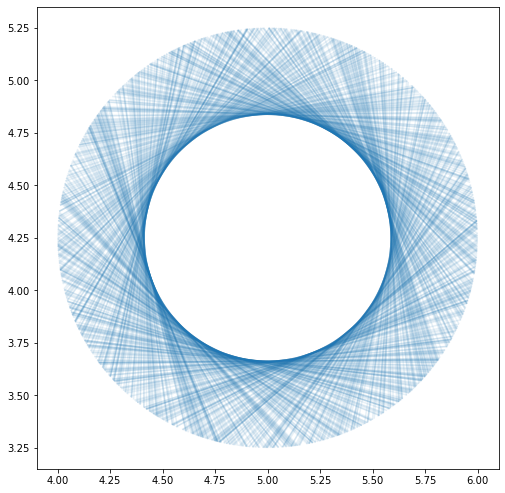

In [ ]:
plt.close('all')
f,ax = plt.subplots(figsize=(11, 8.5), frameon=False)
layers = []
ca = gg.ChordArray(center = np.array([5, 4.25]), radius=1)
ca.add_random_chords_at_set_d_theta(n_chords=800, d_theta= np.pi * 0.6)
lines = gg.layer_to_lines(ca.lines)
lc = LineCollection(lines, alpha=0.1)
layers.append(ca.lines)
ax.add_collection(lc)
ax.axis('tight')
ax.axis('square')
# ax.set_xlim((0, 11))
# ax.set_ylim((0, 8.5))

In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0002_chord_array_single.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=layers, filename=save_filepath)

# chord array grids

In [ ]:
x_centers = np.linspace(2.5, 8.5, 3)
y_centers = np.linspace(2.5, 6, 2)
xcs, ycs = np.meshgrid(x_centers, y_centers)
xcs = xcs.ravel()
ycs = ycs.ravel()
n_grams = len(xcs)
d_thetas = np.linspace(np.pi *0.5, np.pi * 1.5, n_grams)

(0.0, 8.5)

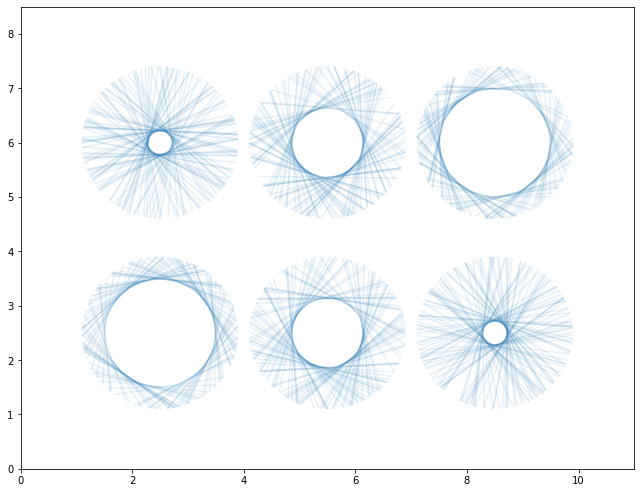

In [ ]:
layers = []
plt.close('all')
f,ax = plt.subplots(figsize=(11, 8.5), frameon=False)
for xc, yc, d_theta in zip(xcs, ycs, d_thetas):
    ca = ws.ChordArray(center = np.array([xc, yc]), radius=1.4)
    ca.add_random_chords_at_set_d_theta(n_chords=100, d_theta= d_theta)
    lines = ws.layer_to_lines(ca.lines)
    layers.append(ca.lines.T)
    lc = LineCollection(lines, alpha=0.1)
    ax.add_collection(lc)


ax.set_xlim((0, 11))
ax.set_ylim((0, 8.5))


In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0001_chord_array.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=layers, filename=save_filepath)

# stochastic single array testing

(3.90000634365733, 6.099995318687268, 3.1500286726049382, 5.350017647634877)

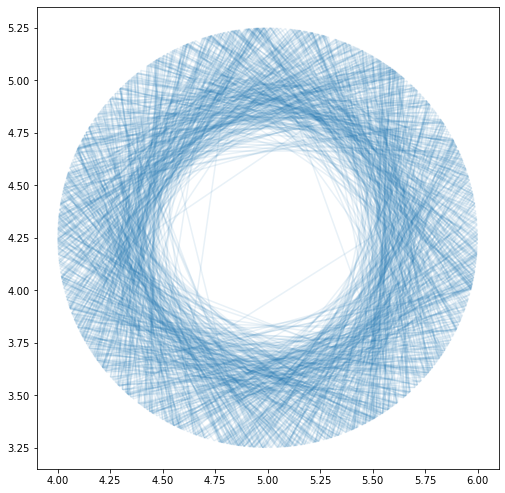

In [ ]:
plt.close('all')
f,ax = plt.subplots(figsize=(11, 8.5), frameon=False)
layers = []
ca = gg.ChordArray(center = np.array([5, 4.25]), radius=1)
ca.add_connected_chords_stochastic_d_theta(
    n_chords=1000,
    d_theta_mu=np.pi * 0.6,
    d_theta_std=0.2
)
lines = gg.layer_to_lines(ca.lines)
lc = LineCollection(lines, alpha=0.1)
layers.append(ca.lines)
ax.add_collection(lc)
ax.axis('tight')
ax.axis('square')

In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0004_chord_array_single_stochastic_theta.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=layers, filename=save_filepath, margin=0.4)

## more variables

(-1.175148387926049,
 1.1989681313407223,
 -1.1630145657898507,
 1.2111019534769205)

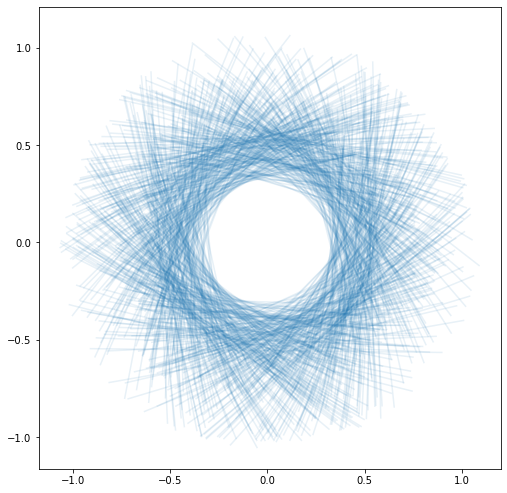

In [ ]:
plt.close('all')
f,ax = plt.subplots(figsize=(11, 8.5), frameon=False)
layers = []
ca = gg.ChordArray(center = np.array([0, 0]), radius=1)
ca.add_nearby_chords_stochastic(
    n_chords=800,
    theta_mu=0,
    theta_std=0.1,
    d_theta_mu=np.pi * 0.65,
    d_theta_std=0.0,
    radius_mu=0.,
    radius_std=0.01,
)
lines = gg.layer_to_lines(ca.lines)
lc = LineCollection(lines, alpha=0.1)
layers.append(ca.lines)
ax.add_collection(lc)
ax.axis('tight')
ax.axis('square')

In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0005_chord_array_single_stochastic_radius.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=layers, filename=save_filepath, margin=0.5)

# radius mod test

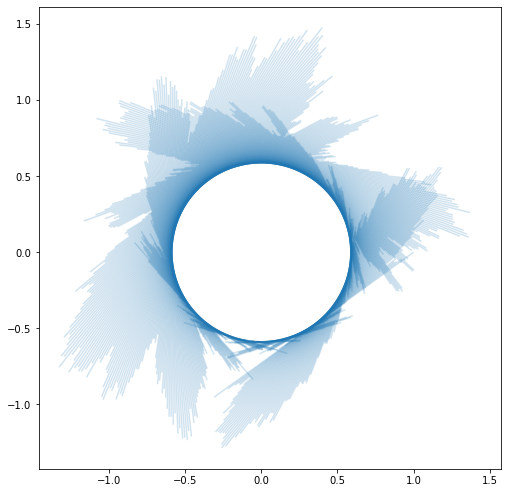

In [ ]:
layers = []
n_chords = 500
d_theta =  - np.pi * 0.6
radius0 = 1
radius1 = 1
max_theta = np.pi * 2
thetas = np.linspace(0, max_theta, n_chords)
ca = gg.ChordFactory(center = np.array([0, 0]), radius=1)

radius_mods = []
radius_mod = 1
radius_mod_step_mu = - 1 / n_chords * 0.02
radius_mod_step_std = 1 / n_chords * 20
for i in range(n_chords):
    radius_mods.append(radius_mod)
    radius_mod = radius_mod + np.random.randn() * radius_mod_step_std + radius_mod_step_mu
radius_mods = np.array(radius_mods)


theta0s = thetas
theta1s = theta0s + d_theta

for theta0, theta1, radius_mod in zip(theta0s, theta1s, radius_mods):
    line = ca.gen_chord(theta0=theta0,
                        theta1=theta1,
                        radius0=radius0,
                        radius1=radius1)
    new_pointB = gg.get_point_on_line(line[:,0], line[:,1], radius_mod)
    new_pointA = gg.get_point_on_line(line[:,1], line[:,0], radius_mod)
    line[:,1] = new_pointB
    line[:,0] = new_pointA
    ca.add_line(line)

plt.close('all')
f,ax = plt.subplots(figsize=(11, 8.5), frameon=False)
ca.plot_lines(ax, lc_kwargs={'alpha':0.2})
ax.axis('tight')
ax.axis('square')
layers.append(ca.lines)

In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0006_random_walk_radius.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=layers, filename=save_filepath, margin=0.5)

(-1.172607409794612, 2.624864606814117, -1.1158683637024618, 2.681603652906267)

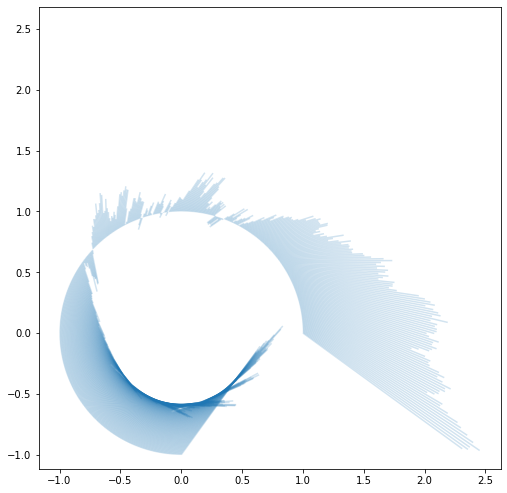

In [ ]:
cf = gg.RadiusModChordFactory(center = np.array([0, 0]))
cf.initialize_params(
                    n_chords=500,
                    d_theta=np.pi*0.6,
                    start_theta=0,
                    end_theta=np.pi*1.5,
                    overshoot_init=-1,
                    overshoot_step_mu=0.01,
                    overshoot_step_std=20,
                    )
cf.add_single_overshoot_chords()
plt.close('all')
f,ax = plt.subplots(figsize=(11, 8.5), frameon=False)
cf.plot_lines(ax, lc_kwargs={'alpha':0.2})
ax.axis('tight')
ax.axis('square')

# RadiusModChord grids

In [ ]:
x_centers = np.linspace(2.5, 8.5, 5)
y_centers = np.linspace(2.5, 6, 4)
xcs, ycs = np.meshgrid(x_centers, y_centers)
xcs = xcs.ravel()
ycs = ycs.ravel()
n_grams = len(xcs)

(0.05413971838853243,
 10.584108698187837,
 0.38298423890689937,
 10.912953218706205)

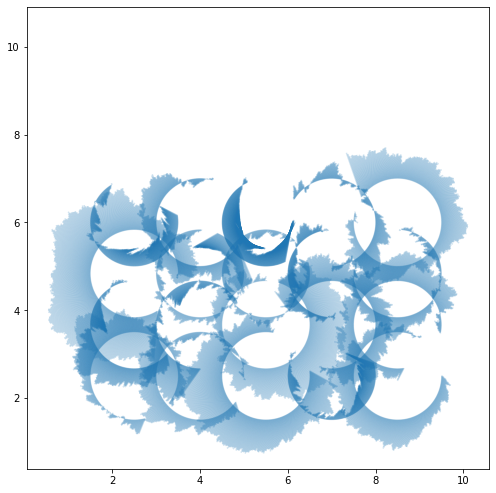

In [ ]:
plt.close('all')
f,ax = plt.subplots(figsize=(11, 8.5), frameon=False)
layers = []
for i in range(n_grams):
    cf = gg.RadiusModChordFactory(center = np.array([xcs[i], ycs[i]]))
    start_theta = np.random.rand() * np.pi * 2
    end_theta = start_theta + np.pi + np.random.rand() * np.pi 
    cf.initialize_params(
                        n_chords=500,
                        d_theta=np.pi*0.6,
                        start_theta=start_theta,
                        end_theta=end_theta,
                        overshoot_init=0.,
                        overshoot_step_mu=-0.00,
                        overshoot_step_std=10,
                        )
    cf.radius0s *= 1
    cf.radius1s *= 1
    cf.add_single_overshoot_chords()
    cf.flip_alternating_lines()
    cf.plot_lines(ax, lc_kwargs={'alpha':0.2})
    layers.append(cf.lines)
ax.axis('tight')
ax.axis('square')

In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0014_random_walk_radius_grid.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=layers, filename=save_filepath, margin=0.4)

# randomly placed RadModChords

(-2.5373147454249874,
 12.320716074746409,
 -2.756629031351144,
 12.101401788820253)

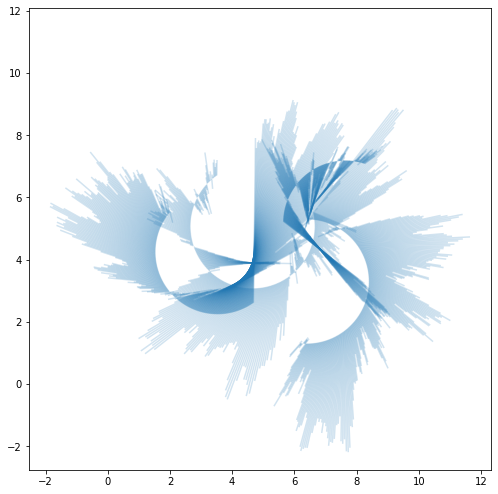

In [ ]:
n_grams = 4
xcs = np.random.rand(n_grams) * 6 + 2.5 
ycs = np.random.rand(n_grams) * 4 + 2.5

plt.close('all')
f,ax = plt.subplots(figsize=(11, 8.5), frameon=False)
layers = []
for i in range(n_grams):
    cf = gg.RadiusModChordFactory(center = np.array([xcs[i], ycs[i]]))
    start_theta = np.random.rand() * np.pi * 2
    end_theta = start_theta + np.pi/2 + np.random.rand() * np.pi
    cf.initialize_params(
                        n_chords=300,
                        d_theta=np.pi*0.6,
                        start_theta=start_theta,
                        end_theta=end_theta,
                        overshoot_init=0,
                        overshoot_step_mu=0.0,
                        overshoot_step_std=30,
                        )
    cf.radius0s *= 2
    cf.radius1s *= 2
    cf.add_single_overshoot_chords()
    cf.flip_alternating_lines()
    cf.plot_lines(ax, lc_kwargs={'alpha':0.2})
    layers.append(cf.lines)
ax.axis('tight')
ax.axis('square')

In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0009_random_walk_radius_multi.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=layers, filename=save_filepath, margin=0.4)

# playing with radius modulation

(-0.734579207175016,
 15.360831290999183,
 -1.981443129389253,
 14.113967368784946)

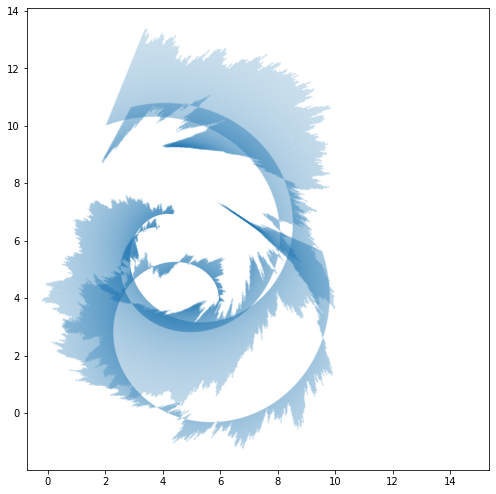

In [ ]:
n_grams = 3
xcs = np.random.rand(n_grams) * 6 + 2.5 
ycs = np.random.rand(n_grams) * 4 + 2.5

plt.close('all')
f,ax = plt.subplots(figsize=(11, 8.5), frameon=False)
layers = []
for i in range(n_grams):
    cf = gg.RadiusModChordFactory(center = np.array([xcs[i], ycs[i]]))
    start_theta = np.random.rand() * np.pi * 3
    end_theta = start_theta + np.pi * 2
    cf.initialize_params(
                        n_chords=1000,
                        d_theta=np.pi*0.6,
                        start_theta=start_theta,
                        end_theta=end_theta,
                        overshoot_init=0,
                        overshoot_step_mu=-0.001,
                        overshoot_step_std=15,
                        )
    cf.radius0s = np.linspace(1, 5, cf.n_chords)
    cf.radius1s = np.linspace(2, 10, cf.n_chords)
    cf.add_single_overshoot_chords()
    cf.flip_alternating_lines()
    cf.plot_lines(ax, lc_kwargs={'alpha':0.2})
    layers.append(cf.lines)
ax.axis('tight')
ax.axis('square')

In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0013_random_walk_radius_multi.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=layers, filename=save_filepath, margin=0.4)

# assuming direct control

(2.4880568857331142, 13.32241667691352, -1.8863679577952603, 8.947991833385146)

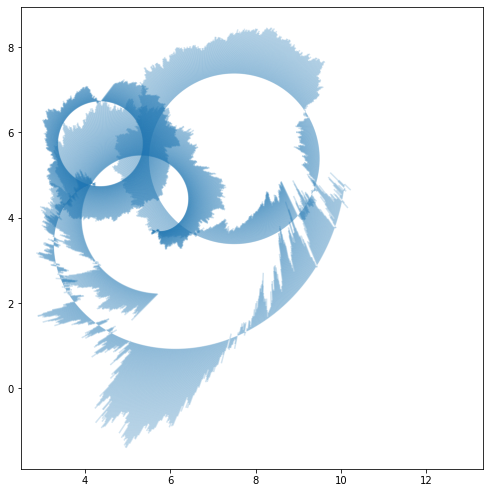

In [ ]:


plt.close('all')
f,ax = plt.subplots(figsize=(11, 8.5), frameon=False)
layers = []

cf = gg.RadiusModChordFactory(center = np.array([np.random.rand() * 6 + 2.5, np.random.rand() * 4 + 2.5]))
start_theta = np.random.rand() * np.pi * 2
end_theta = start_theta + np.pi * 2
cf.initialize_params(
                    n_chords=1000,
                    d_theta=np.pi*0.6,
                    start_theta=start_theta,
                    end_theta=end_theta,
                    overshoot_init=0,
                    overshoot_step_mu=-0.001,
                    overshoot_step_std=15,
                    )
cf.radius0s = np.linspace(0.5, 2, cf.n_chords)
cf.radius1s = np.linspace(1, 4, cf.n_chords)
cf.add_single_overshoot_chords()
cf.flip_alternating_lines()
cf.plot_lines(ax, lc_kwargs={'alpha':0.2})
layers.append(cf.lines)

cf = gg.RadiusModChordFactory(center = np.array([np.random.rand() * 6 + 2.5, np.random.rand() * 4 + 2.5]))
start_theta = np.random.rand() * np.pi * 2
end_theta = start_theta + np.pi * 2
cf.initialize_params(
                    n_chords=1000,
                    d_theta=np.pi*0.6,
                    start_theta=start_theta,
                    end_theta=end_theta,
                    overshoot_init=0,
                    overshoot_step_mu=-0.001,
                    overshoot_step_std=15,
                    )
cf.radius0s = np.linspace(2, 2, cf.n_chords)
cf.radius1s = np.linspace(1, 1, cf.n_chords)
cf.add_single_overshoot_chords()
cf.flip_alternating_lines()
cf.plot_lines(ax, lc_kwargs={'alpha':0.2})
layers.append(cf.lines)


cf = gg.RadiusModChordFactory(center = np.array([np.random.rand() * 6 + 2.5, np.random.rand() * 4 + 2.5]))
start_theta = np.random.rand() * np.pi * 2
end_theta = start_theta + np.pi * 2
cf.initialize_params(
                    n_chords=1000,
                    d_theta=np.pi*0.6,
                    start_theta=start_theta,
                    end_theta=end_theta,
                    overshoot_init=0,
                    overshoot_step_mu=-0.001,
                    overshoot_step_std=15,
                    )
cf.radius0s = np.linspace(1, 1, cf.n_chords)
cf.radius1s = np.linspace(1, 1, cf.n_chords)
cf.add_single_overshoot_chords()
cf.flip_alternating_lines()
cf.plot_lines(ax, lc_kwargs={'alpha':0.2})
layers.append(cf.lines)

cf = gg.RadiusModChordFactory(center = np.array([np.random.rand() * 6 + 2.5, np.random.rand() * 4 + 2.5]))
start_theta = np.random.rand() * np.pi * 2
end_theta = start_theta + np.pi * 1.2
cf.initialize_params(
                    n_chords=1000,
                    d_theta=np.pi*0.6,
                    start_theta=start_theta,
                    end_theta=end_theta,
                    overshoot_init=0,
                    overshoot_step_mu=-0.001,
                    overshoot_step_std=15,
                    )
cf.radius0s = np.linspace(1, 5, cf.n_chords)
cf.radius1s = np.linspace(2, 10, cf.n_chords)
cf.add_single_overshoot_chords()
cf.flip_alternating_lines()
cf.plot_lines(ax, lc_kwargs={'alpha':0.2})
layers.append(cf.lines)

ax.axis('tight')
ax.axis('square')

In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0011_random_walk_radius_multi.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=layers, filename=save_filepath, margin=0.4)

## making lines fatter for ultra-fine tip sharpie (which is not that ultra-fine tbh)

(-2.0362453928906588,
 12.171264476011487,
 -2.982767148147894,
 11.224742720754254)

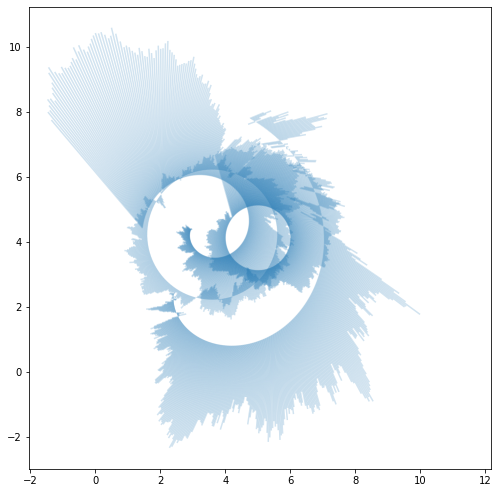

In [ ]:
plt.close('all')
f,ax = plt.subplots(figsize=(11, 8.5), frameon=False)
layers = []

cf = gg.RadiusModChordFactory(center = np.array([np.random.rand() * 6 + 2.5, np.random.rand() * 4 + 2.5]))
start_theta = np.random.rand() * np.pi * 2
end_theta = start_theta + np.pi * 2
cf.initialize_params(
                    n_chords=500,
                    d_theta=np.pi*0.6,
                    start_theta=start_theta,
                    end_theta=end_theta,
                    overshoot_init=0,
                    overshoot_step_mu=-0.001,
                    overshoot_step_std=15,
                    )
cf.radius0s = np.linspace(0.5, 2, cf.n_chords)
cf.radius1s = np.linspace(1, 4, cf.n_chords)
cf.add_single_overshoot_chords()
cf.flip_alternating_lines()
cf.plot_lines(ax, lc_kwargs={'alpha':0.2})
layers.append(cf.lines)

cf = gg.RadiusModChordFactory(center = np.array([np.random.rand() * 6 + 2.5, np.random.rand() * 4 + 2.5]))
start_theta = np.random.rand() * np.pi * 2
end_theta = start_theta + np.pi * 2
cf.initialize_params(
                    n_chords=500,
                    d_theta=np.pi*0.6,
                    start_theta=start_theta,
                    end_theta=end_theta,
                    overshoot_init=0,
                    overshoot_step_mu=-0.001,
                    overshoot_step_std=15,
                    )
cf.radius0s = np.linspace(2, 2, cf.n_chords)
cf.radius1s = np.linspace(1, 1, cf.n_chords)
cf.add_single_overshoot_chords()
cf.flip_alternating_lines()
cf.plot_lines(ax, lc_kwargs={'alpha':0.2})
layers.append(cf.lines)


cf = gg.RadiusModChordFactory(center = np.array([np.random.rand() * 6 + 2.5, np.random.rand() * 4 + 2.5]))
start_theta = np.random.rand() * np.pi * 2
end_theta = start_theta + np.pi * 2
cf.initialize_params(
                    n_chords=500,
                    d_theta=np.pi*0.6,
                    start_theta=start_theta,
                    end_theta=end_theta,
                    overshoot_init=0,
                    overshoot_step_mu=-0.001,
                    overshoot_step_std=15,
                    )
cf.radius0s = np.linspace(1, 1, cf.n_chords)
cf.radius1s = np.linspace(1, 1, cf.n_chords)
cf.add_single_overshoot_chords()
cf.flip_alternating_lines()
cf.plot_lines(ax, lc_kwargs={'alpha':0.2})
layers.append(cf.lines)

cf = gg.RadiusModChordFactory(center = np.array([np.random.rand() * 6 + 2.5, np.random.rand() * 4 + 2.5]))
start_theta = np.random.rand() * np.pi * 2
end_theta = start_theta + np.pi * 1.2
cf.initialize_params(
                    n_chords=500,
                    d_theta=np.pi*0.6,
                    start_theta=start_theta,
                    end_theta=end_theta,
                    overshoot_init=0,
                    overshoot_step_mu=-0.001,
                    overshoot_step_std=15,
                    )
cf.radius0s = np.linspace(1, 5, cf.n_chords)
cf.radius1s = np.linspace(2, 10, cf.n_chords)
cf.add_single_overshoot_chords()
cf.flip_alternating_lines()
cf.plot_lines(ax, lc_kwargs={'alpha':0.2})
layers.append(cf.lines)

ax.axis('tight')
ax.axis('square')

In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0012_random_walk_radius_multi.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=layers, filename=save_filepath, margin=0.4)

# Bezier chord overshoot mod

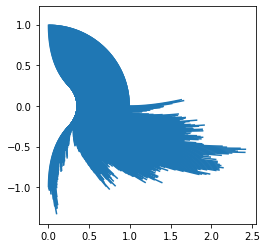

In [ ]:
f, ax = plt.subplots()
layers = []
lf = gg.RadiusModBezierChordFactory()
lf.initialize_params(
                    n_chords=300,
                    d_theta=np.pi*1.5,
                    start_theta=0,
                    end_theta=np.pi*0.5,
                    middle_node_rel_thetas=[0.5,],
                    overshoot_init=1,
                    overshoot_step_mu=0.0,
                    overshoot_step_std = 10,
                    )
lf.radii[:,0] *= 1
lf.radii[:,1] *= 0
lf.add_single_overshoot_bezier_chords()
lf.plot_lines(ax=ax)
layers.append(lf.lines)

In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0015_random_walk_radius_bezier.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=layers, filename=save_filepath, margin=0.4)

# globe test

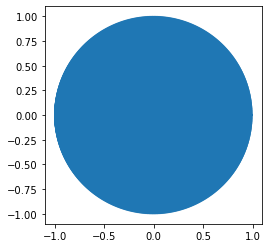

In [ ]:
f, ax = plt.subplots()
layers = []
lf = gg.RadiusModBezierChordFactory()
start_theta = 0
end_theta = start_theta + np.pi*1
lf.globe_params(
                    n_chords=500,
                    start_theta=start_theta,
                    end_theta=end_theta,
                    middle_node_rel_thetas=[0.5,],
                    overshoot_init=1,
                    overshoot_step_mu=0.0,
                    overshoot_step_std = 0,
                    )
lf.add_single_overshoot_bezier_chords()
lf.plot_lines(ax=ax)
layers.append(lf.lines)

In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0016_random_walk_radius_bezier.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=layers, filename=save_filepath, margin=0.4)

# Direct control, a little mixing

(3.371679754912194, 4.650075704691982, 3.34883490732091, 4.627230857100698)

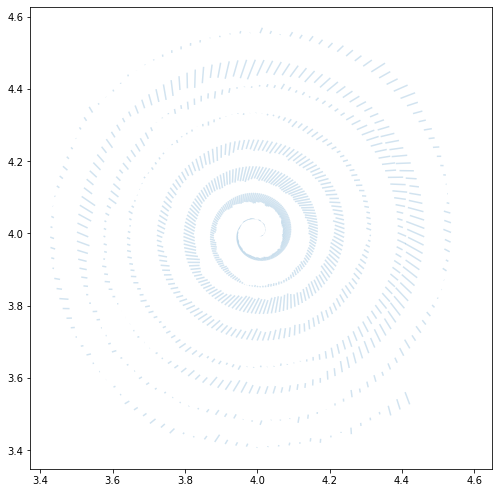

In [ ]:
plt.close('all')
f,ax = plt.subplots(figsize=(11, 8.5), frameon=False)
layers = []

cf = gg.RadiusModChordFactory(center = np.array([4, 4]))
start_theta = np.random.rand() * np.pi * 2
end_theta = start_theta + np.pi * 16
cf.initialize_params(
                    n_chords=1005,
                    d_theta=np.pi*0.6,
                    start_theta=start_theta,
                    end_theta=end_theta,
                    overshoot_init=0,
                    overshoot_step_mu=-0.00,
                    overshoot_step_std=10,
                    )
cf.radius0s = np.linspace(0.01, 0.6, cf.n_chords)
cf.radius1s = np.linspace(0.01, 0.3, cf.n_chords)
cf.add_single_overshoot_chords()
cf.flip_alternating_lines()
cf.plot_lines(ax, lc_kwargs={'alpha':0.2})
layers.append(cf.lines)

# lf = gg.RadiusModBezierChordFactory(center = np.array([6, 4]))
# lf.initialize_params(
#                     n_chords=400,
#                     d_theta=np.pi*1.5,
#                     start_theta=0,
#                     end_theta=np.pi*1,
#                     middle_node_rel_thetas=[0.5,],
#                     overshoot_init=1,
#                     overshoot_step_mu=0.0,
#                     overshoot_step_std = 10,
#                     )
# lf.radii[:,0] *= 1
# lf.radii[:,1] *= 0
# lf.add_single_overshoot_bezier_chords()
# lf.plot_lines(ax=ax, lc_kwargs={'alpha':0.2})
# layers.append(lf.lines)

ax.axis('tight')
ax.axis('square')

In [ ]:
savedir = Path('/mnt/c/code/side/good_robot/images')
filename = '0018_manual_radius_bezier.svg'
save_filepath = savedir.joinpath(filename)
write.write_plot(plot=layers, filename=save_filepath, margin=0.4)